<a href="https://colab.research.google.com/github/Parinita-Jain/ML_LectureNotes/blob/main/CART_and_CHAID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
CART (Classification and Regression Trees)
CART is a decision tree algorithm used for classification and regression tasks.
It works by recursively splitting data into subsets based on feature values to create a tree structure. Here's a detailed explanation:

Key Features of CART:
Binary Splits Only:

At each node, CART performs binary splits (e.g., "Yes/No").
This means a feature can split the data into exactly two groups.
Gini Impurity for Classification:

It uses Gini impurity or other measures like entropy to evaluate splits in classification tasks.
The goal is to minimize impurity, making the resulting subsets as pure as possible.

Mean Squared Error for Regression:

For regression tasks, CART minimizes the variance within subsets, often using mean squared error (MSE) as a criterion.

Pruning:

CART creates a fully grown tree first and then "prunes" it back to avoid overfitting by removing less significant splits.
Example Use Case:
Predicting whether a customer will buy a product (classification).
Estimating house prices based on features like size and location (regression).
CHAID (Chi-squared Automatic Interaction Detection)
CHAID is a decision tree algorithm designed for classification tasks,
particularly with categorical data. It uses statistical tests to identify the best splits.

Key Features of CHAID:
Multi-way Splits:

Unlike CART, CHAID can create multiple branches at a single node, not just binary splits.
Chi-squared Test for Classification:

For categorical target variables, CHAID uses the Chi-squared test of independence to determine the best splits.
It finds the feature most significantly associated with the target variable.
F-tests for Continuous Targets:

When the target variable is continuous, it uses the F-test to evaluate potential splits.
Merging Categories:

CHAID can merge similar categories of a predictor into a single branch to simplify the tree.
No Pruning:

CHAID stops splitting nodes based on statistical significance rather than pruning after the tree is fully grown.
Example Use Case:
Segmenting customers based on their demographics and purchase behavior.
Analyzing survey data to identify significant patterns.
Comparison: CART vs. CHAID
Feature	CART	CHAID
Splitting	Binary splits only	Multi-way splits possible
Criterion	Gini impurity, MSE, or entropy	Chi-squared or F-test
Target Variable	Continuous or categorical	Primarily categorical
Pruning	Yes, post-tree generation	No pruning; stops splitting based on p-values
Interpretability	More detailed binary splits	Simpler, higher-level splits
When to Use:

Use CART for more granular, detailed splits, especially when your task involves continuous target variables.
Use CHAID when working with categorical variables and you want easily interpretable, high-level insights.

CART (Classification and Regression Trees)
CART is a type of decision tree algorithm that forms the foundation of many decision tree implementations, including the DecisionTreeClassifier and DecisionTreeRegressor in scikit-learn. Here's how CART works:

Classification Trees:

Used for categorical target variables (e.g., predicting if a customer will buy a product: Yes/No).
Splits are based on minimizing impurity, typically using Gini Impurity or Entropy.
Regression Trees:

Used for continuous target variables (e.g., predicting house prices).
Splits minimize variance or other error metrics like Mean Squared Error (MSE).
Binary Splits Only:

CART always produces binary splits (yes/no at each node).
Pruning:

CART uses pruning to avoid overfitting. It starts by growing a complete tree and then prunes back to improve generalization.
In scikit-learn:

DecisionTreeClassifier implements CART for classification.
DecisionTreeRegressor implements CART for regression.
CHAID (Chi-squared Automatic Interaction Detection)
CHAID is a decision tree technique designed primarily for categorical data analysis. It's different from CART in several ways:

Multi-way Splits:

CHAID allows multi-way splits (not restricted to binary). This means a feature with multiple categories can branch into more than two nodes.
Splitting Criterion:

Uses Chi-squared test of independence for categorical targets to determine splits.
For continuous targets, CHAID uses an F-test to evaluate splits.
Category Merging:

If categories of a predictor are statistically similar, CHAID merges them, reducing complexity.
Stopping Rules:

CHAID stops growing the tree when no statistically significant splits remain. It doesn’t rely on pruning but stops naturally based on p-values.
Target Variable:

Primarily used for categorical target variables but can handle continuous targets.
Key Differences Between CART and CHAID
Feature	CART	CHAID
Splits	Binary splits only	Multi-way splits possible
Splitting Criterion	Gini impurity, entropy, or MSE	Chi-squared or F-test
Target Variable	Both categorical and continuous	Primarily categorical
Pruning	Yes (post-tree generation)	No pruning; stops based on significance
Category Handling	Does not merge categories	Merges statistically similar categories
Use Case	Classification, regression	Categorical data analysis, segmentation
How CART Relates to DecisionTreeClassifier/Regressor
CART is the Algorithm:

DecisionTreeClassifier and DecisionTreeRegressor in scikit-learn are implementations of the CART algorithm.
CART's Scope:

CART handles both classification and regression tasks.
It is designed to minimize a specific impurity measure (e.g., Gini, entropy, MSE).
When to Use What?
CART:

Use DecisionTreeClassifier or DecisionTreeRegressor when you need predictive modeling for classification or regression tasks.
It is best suited for machine learning applications.
CHAID:

Use CHAID for data exploration, segmentation, or when you need interpretable results for categorical data (e.g., market segmentation, survey analysis).
CHAID is more common in statistics and marketing research than in machine learning.
Would you like me to demonstrate CART or CHAID with a real-world example?
'''

'\nCART (Classification and Regression Trees)\nCART is a decision tree algorithm used for classification and regression tasks. It works by recursively splitting data into subsets based on feature values to create a tree structure. Here\'s a detailed explanation:\n\nKey Features of CART:\nBinary Splits Only:\n\nAt each node, CART performs binary splits (e.g., "Yes/No").\nThis means a feature can split the data into exactly two groups.\nGini Impurity for Classification:\n\nIt uses Gini impurity or other measures like entropy to evaluate splits in classification tasks.\nThe goal is to minimize impurity, making the resulting subsets as pure as possible.\nMean Squared Error for Regression:\n\nFor regression tasks, CART minimizes the variance within subsets, often using mean squared error (MSE) as a criterion.\nPruning:\n\nCART creates a fully grown tree first and then "prunes" it back to avoid overfitting by removing less significant splits.\nExample Use Case:\nPredicting whether a customer

In [7]:
#For Predicting Whether a Customer Will Buy a Product (Classification)
#We'll use a decision tree classifier (CART).
'''
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Simulated dataset
data = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Income': [50000, 60000, 70000, 80000, 90000],
    'Bought': [0, 1, 1, 0, 1]  # 0 = Not Bought, 1 = Bought
})

# Features and target
X = data[['Age', 'Income']]
y = data['Bought']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
'''
'''
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Simulated larger dataset
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.randint(18, 60, 100),  # Ages between 18 and 60
    'Income': np.random.randint(20000, 100000, 100),  # Incomes between 20k and 100k
    'Bought': np.random.choice([0, 1], size=100, p=[0.4, 0.6])  # Random binary target with 60% probability for 1
})

# Features and target
X = data[['Age', 'Income']]
y = data['Bought']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
'''

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Simulated dataset with meaningful patterns
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.randint(18, 60, 100),  # Ages between 18 and 60
    'Income': np.random.randint(20000, 100000, 100),  # Incomes between 20k and 100k
})

# Create a target variable with a clear pattern
# Customers are more likely to buy if they are young (Age < 35) and earn more than 50,000
data['Bought'] = np.where((data['Age'] < 35) & (data['Income'] > 50000), 1, 0)

# Features and target
X = data[['Age', 'Income']]
y = data['Bought']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


#2. Estimating House Prices Based on Features (Regression)
#We'll use a decision tree regressor (CART).
'''
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Simulated dataset
data = pd.DataFrame({
    'Size': [1000, 1500, 2000, 2500, 3000],  # in square feet
    'Location': [1, 2, 3, 4, 5],  # Encoded location quality
    'Price': [300000, 350000, 400000, 450000, 500000]  # House prices
})

# Features and target
X = data[['Size', 'Location']]
y = data['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
'''
'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Simulated larger dataset
np.random.seed(42)
data = pd.DataFrame({
    'Size': np.random.randint(500, 5000, 100),  # Sizes between 500 and 5000 sq ft
    'Location': np.random.randint(1, 6, 100),  # Location quality (encoded 1 to 5)
})

# Create a realistic pattern for Price
# Price increases with size and better location quality
data['Price'] = data['Size'] * 100 + data['Location'] * 20000 + np.random.randint(-5000, 5000, 100)

# Features and target
X = data[['Size', 'Location']]
y = data['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Generate a perfectly predictable dataset
np.random.seed(42)
data = pd.DataFrame({
    'Size': np.random.randint(500, 5000, 100),  # Sizes between 500 and 5000 sq ft
    'Location': np.random.randint(1, 6, 100),  # Location quality (1 to 5)
})

# Define a perfect relationship for Price
data['Price'] = data['Size'] * 100 + data['Location'] * 20000

# Features and target
X = data[['Size', 'Location']]
y = data['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model with a limited depth
model = DecisionTreeRegressor(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

#3. Segmenting Customers Based on Demographics (CHAID-like Clustering)
#We'll use KMeans clustering to create customer segments.


from sklearn.cluster import KMeans

# Simulated dataset
data = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Income': [50000, 60000, 70000, 80000, 90000]
})

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # 2 customer segments
data['Cluster'] = kmeans.fit_predict(data)

print("Segmented Data:")
print(data)

#4. Analyzing Survey Data to Identify Significant Patterns (CHAID)
#We'll use Chi-squared tests for categorical data analysis.


from scipy.stats import chi2_contingency

# Simulated survey data
survey_data = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Response': ['Yes', 'No', 'Yes', 'Yes', 'No']
})

# Create a contingency table
contingency_table = pd.crosstab(survey_data['Gender'], survey_data['Response'])
print(contingency_table)
# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared value:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Significant association found between Gender and Response.")
else:
    print("No significant association found.")

Accuracy: 1.0
Mean Squared Error: 447941500.0
Segmented Data:
   Age  Income  Cluster
0   25   50000        0
1   30   60000        0
2   35   70000        0
3   40   80000        1
4   45   90000        1
Response  No  Yes
Gender           
Female     1    1
Male       1    2
Chi-squared value: 0.0
p-value: 1.0
No significant association found.


CART Model Accuracy: 0.5


[Text(0.4230769230769231, 0.875, 'Income <= 35707.5\ngini = 0.447\nsamples = 80\nvalue = [27, 53]\nclass = Yes'),
 Text(0.15384615384615385, 0.625, 'Income <= 21449.5\ngini = 0.26\nsamples = 13\nvalue = [2, 11]\nclass = Yes'),
 Text(0.28846153846153844, 0.75, 'True  '),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.23076923076923078, 0.375, 'Age <= 56.5\ngini = 0.153\nsamples = 12\nvalue = [1, 11]\nclass = Yes'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = Yes'),
 Text(0.3076923076923077, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.6923076923076923, 0.625, 'Income <= 54760.0\ngini = 0.468\nsamples = 67\nvalue = [25, 42]\nclass = Yes'),
 Text(0.5576923076923077, 0.75, '  False'),
 Text(0.5384615384615384, 0.375, 'Income <= 44157.0\ngini = 0.495\nsamples = 20\nvalue = [11, 9]\nclass = No'),
 Text(0.46153846153846156, 0.125, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]\nc

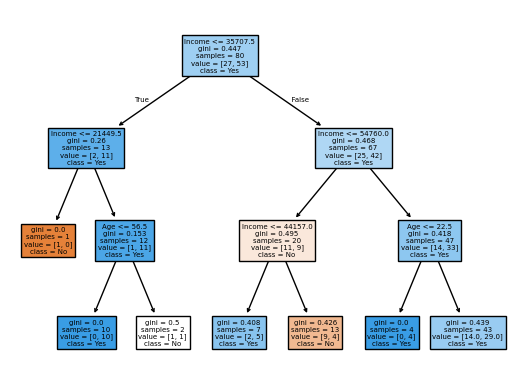

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Simulated dataset for classification
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.randint(18, 60, 100),         # Ages between 18 and 60
    'Income': np.random.randint(20000, 100000, 100),  # Incomes between 20k and 100k
    'Bought': np.random.choice([0, 1], size=100, p=[0.4, 0.6])  # 0: No, 1: Yes
})

# Features and target
X = data[['Age', 'Income']]
y = data['Bought']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CART model
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("CART Model Accuracy:", accuracy)

# Visualize the decision tree
tree.plot_tree(model, feature_names=['Age', 'Income'], class_names=['No', 'Yes'], filled=True)


In [9]:
import pandas as pd
from scipy.stats import chi2_contingency

# Simulated dataset for CHAID-like segmentation
data = pd.DataFrame({
    'Age_Group': ['18-25', '26-35', '36-45', '46-55', '56+'] * 20,
    'Bought': np.random.choice(['Yes', 'No'], size=100, p=[0.6, 0.4])
})

# Contingency table (cross-tabulation)
contingency_table = pd.crosstab(data['Age_Group'], data['Bought'])

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-squared value:", chi2)
print("p-value:", p)

# Interpret results
if p < 0.05:
    print("Significant association found between Age Group and Purchase Behavior.")
else:
    print("No significant association found.")


Contingency Table:
Bought     No  Yes
Age_Group         
18-25      10   10
26-35       6   14
36-45       8   12
46-55      11    9
56+         5   15

Chi-squared value: 5.416666666666666
p-value: 0.24715223555106994
No significant association found.
